In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy.linalg import svd

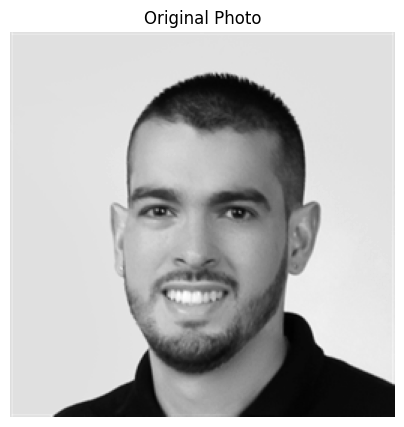

In [2]:
# path to photos
classmates_photos = "../classmates_photos"

# Load my photo
my_photo = Image.open(f"{classmates_photos}/Imagen5.png")

# Resize and convert to grayscale
my_photo = my_photo.resize((256, 256)).convert("L")

# Plot my_photo
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(my_photo, cmap="gray")
plt.title("Original Photo")
plt.show()

# Convert image to a numpy array to apply SVE
my_photo_arr = np.array(my_photo,dtype=np.float64)

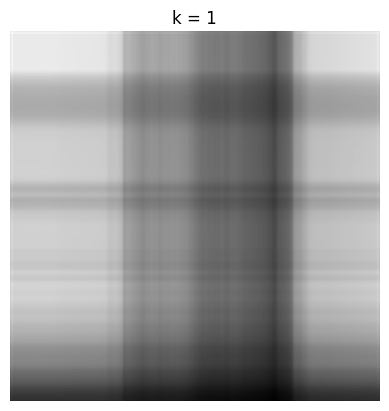

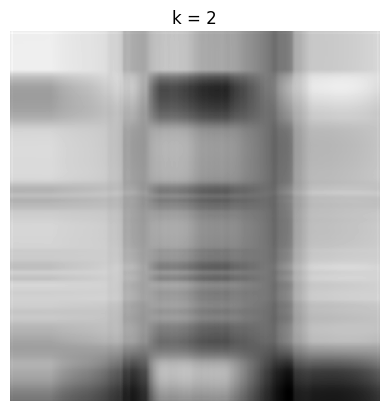

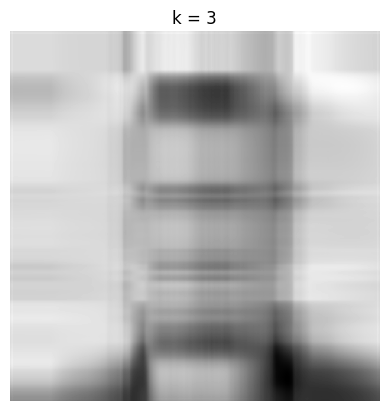

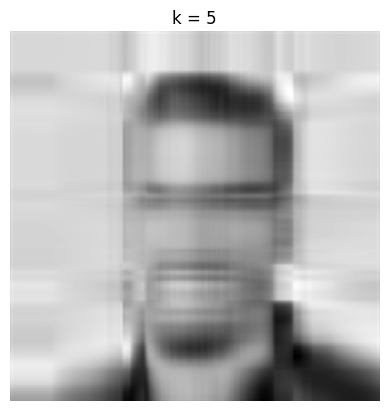

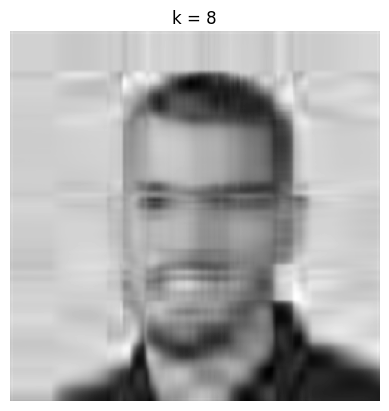

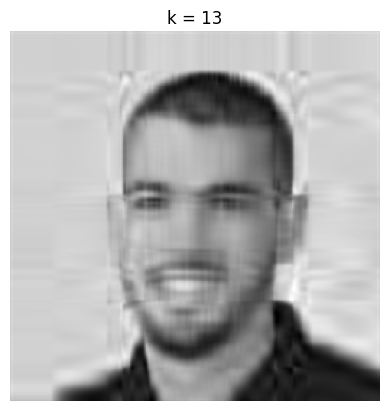

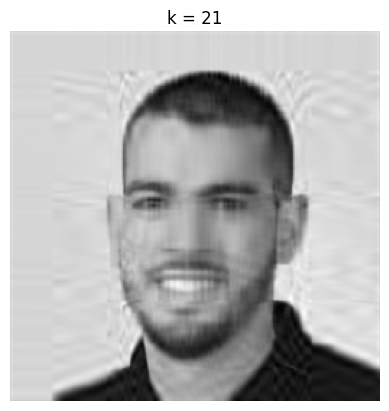

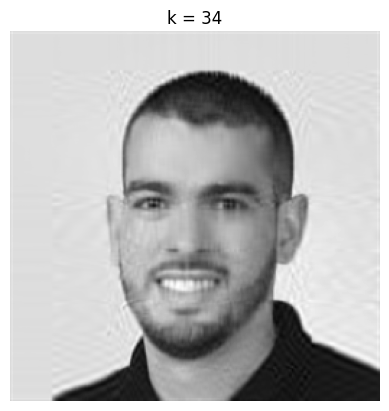

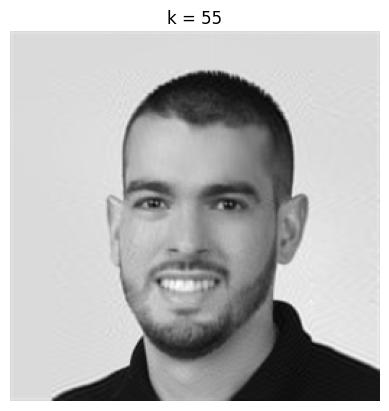

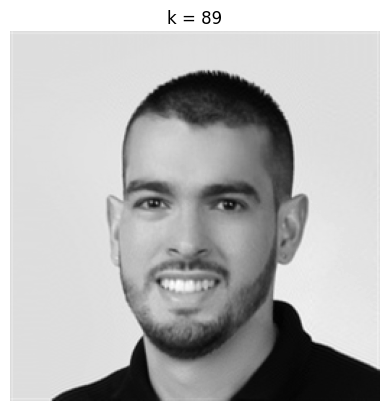

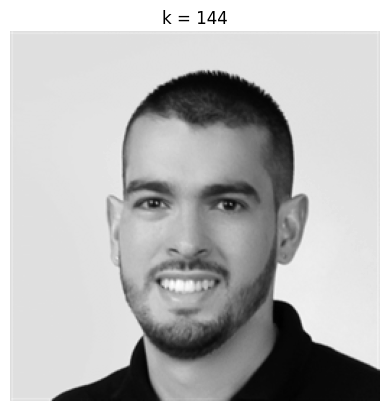

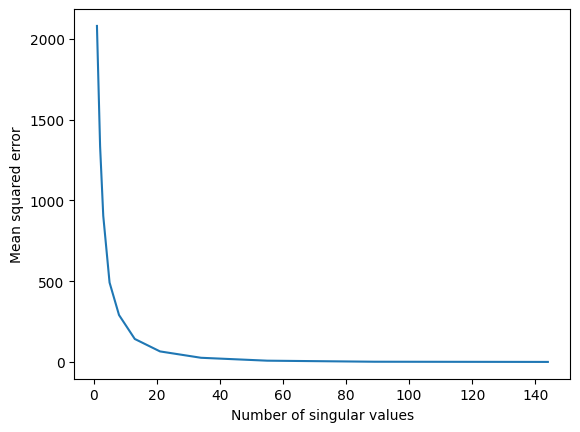

In [4]:
# Apply SVD
U, s, Vt = svd(my_photo)

# Reconstruct image progressively increasing number of singular values
num_singular_values = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
mse_values = []

for k in num_singular_values:
    # Construct approximation using k singular values
    approx = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

    # Calculate mean squared error between original and approximation
    mse = np.mean((my_photo - approx)**2)
    mse_values.append(mse)

    # Plot approximation
    plt.figure()
    plt.axis('off')
    plt.imshow(approx, cmap='gray')
    plt.title('k = {}'.format(k))

# Plot MSE values
plt.figure()
plt.plot(num_singular_values, mse_values)
plt.xlabel('Number of singular values')
plt.ylabel('Mean squared error')
plt.show()

### Is there any point where you can say the image is appropriately reproduced?
Yes, from `k=55` the image is reproduced in an acceptable way. When `k=89` the image returns to its original state.

####

### How would you quantify how different your photo and the approximation are?
I quantified it using **Mean Squared Error (MSE)** and plotted this measurement. In fact, the graph confirms that the MSE is 0 approximately from ` k=60`.